<a href="https://colab.research.google.com/github/akifnu/DSprojects/blob/main/The_Double_Jeopardy_Law_Myth_or_Harsh_Reality%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Double Jeopardy Law: Myth or Harsh Reality?**

I picked up second-hand copies of *How Brands Grow* Volumes 1 and 2, the new copies were well beyond my budget as a poor sustainability consultant living in Germany. Few pages in and **Double Jeopardy law** hooked me immediately: **smaller brands not only struggle to attract customers but also naturally suffer lower loyalty**. That insight is especially striking for small or B2B brands that pour loads of money into loyalty programs, hoping to compensate for low market penetration. As a data-obsessed skeptic (yes, I’ll even fire up LightGBM to factcheck arguments). After reading Seth Godin and countless hype-driven romantic marketing books always left me with skepticism, I looked for hard evidence or data to validate their claims in the books, but hardly found anything. So this time, with full of skepticism, I found a public e-commerce dataset to run my analysis, the below pieces are the analysis. To my surprise, the analysis confirmed the law: smaller reac::h “brands/products”  actually underperformed on both fronts (Thus double Jeopardy). It was a mindblowing, data-grounded reality check that satisfied my curious and skeptic mind making me believe that sometimes very counterintuitive, uncomfortable and unromantic pattern is the one worth trusting.  


Therefore,

**Total Sales = Unique Buyers (Market Penetration) × Average Repeat Purchases (Loyalty)**

- **Unique Buyers:** count of distinct customers who bought  
- **Average Repeat Purchases:** average number of times each buyer returns  

*Double Jeopardy Law* tells us that to grow sales, to mostly focus on acquiring more unique buyers, the repeat purchase rates will increase naturally.

The take home message is

**Low reach results in low loyality**

#**Double Jeopardy Law & Hypothesis**

The Double Jeopardy law in marketing states that brands or products with higher market penetration (more unique buyers) also tend to exhibit higher customer loyalty (repeat purchase rates, unique buyers coming back for repeat purchase). In other words, smaller brands face a **"double disadvantage"**: they have both fewer buyers and lower repeat rates (Ehrenberg, Goodhardt, & Barwise, 1990).**If this is to be true, we will find evidence of positive correlation between product penetration and repeat rate in our dataset**

Reference: Ehrenberg, A. S. C., Goodhardt, G. J., & Barwise, T. P. (1990). Double jeopardy revisited. Journal of Marketing, 54(3), 82–91. https://doi.org/10.1177/002224299005400306

# **Core Hypothesis**

We hypothesize that there will be a positive correlation (Both Spearmann and Pearson) between product penetration and repeat rate, consistent with the Double Jeopardy effect.

#**Dataset Introduction**

We used the Online Retail II dataset, which contains transactions from a UK-based non-store online retailer between December 1, 2009, and December 9, 2011. The company sells unique all-occasion gift-ware, with many wholesale customers. The dataset includes invoices, product details, quantities, and customer IDs, making it suitable for analyzing buying behaviors and testing the Double Jeopardy law.

Source: Chen, D. (2022). Online Retail II Data Set [Data set]. UCI Machine Learning Repository. https://doi.org/10.24432/C5CG6D



#**Variable Description**

| Variable Name  | Description                                                  |
|----------------|--------------------------------------------------------------|
| `Invoice`      | Invoice number (unique for each transaction)                 |
| `StockCode`    | Product code (unique identifier for each product)            |
| `Description`  | Textual description of the product                           |
| `Quantity`     | Number of units purchased in the transaction                 |
| `InvoiceDate`  | Date and time when the transaction occurred                  |
| `Price`        | Unit price of the product in GBP (£)                         |
| `Customer ID`  | Anonymized identifier for the customer                       |
| `Country`      | Country of the customer                                      |


#**Further Data Cleaning**

The original dataset contained data from 40 countries, for the sake of analysis we only kept the data from UK and only kept the data that have customer_id

## **Summary of Key Steps**

We begin by loading your transaction data and **filtering** to include only positive purchases to avoid counting returns. Next, we compute **market penetration** as:

$$
\text{Penetration}_p = \frac{\#\{\text{unique buyers of } p\}}{\#\{\text{all customers}\}}
$$

using the ratio of unique buyers to total customers. Then we calculate **repeat rate** as:

$$
\text{RepeatRate}_p = \frac{\#\{\text{buyers of } p \text{ with } > 1 \text{ distinct purchase occasion}\}}{\#\{\text{buyers of } p\}}
$$

where *purchase occasion* is measured by distinct invoices per customer–product pair. Finally, we rank products by **total sales volume**, compute the **Pearson** and **Spearmann** correlation between penetration and repeat rate to test Double Jeopardy, and plot the scatter with a regression line.


# **Data Cleaning**

In [ ]:
import pandas as pd

# Load both sheets
file_path = '/content/online_retail_II.xlsx'

# Load each sheet
df_2009_2010 = pd.read_excel(file_path, sheet_name='Year 2009-2010',  parse_dates=['InvoiceDate'])
df_2010_2011 = pd.read_excel(file_path, sheet_name='Year 2010-2011' , parse_dates=['InvoiceDate'])

# Combine the two sheets
df = pd.concat([df_2009_2010, df_2010_2011], ignore_index=True)

# Assess the data
print("Initial shape:", df.shape)
print("Columns:", df.columns)
print(df.info())

# Filter: keep only United Kingdom and remove rows with missing Customer ID
df = (
    df
    .dropna(subset=['Customer ID'])
    .query('Country == "United Kingdom"')
)

# Check the result
print("Filtered shape:", df.shape)
df.head()



Initial shape: (1067371, 8)
Columns: Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None
Filtered shape: (741301, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Keep only positive quantities (exclude returns) and drop missing keys
df = (
    df
    .dropna(subset=['Customer ID','Description','Quantity','InvoiceDate'])
    .query('Quantity > 0')
    .copy()
)


# **Calculation of market penetration**

In [ ]:
# Total unique customers in the dataset
total_customers = df['Customer ID'].nunique()

# Compute buyers per product
penetration_df = (
    df
    .groupby('Description')['Customer ID']
    .nunique()
    .reset_index(name='Buyers')
)
penetration_df['Penetration'] = penetration_df['Buyers'] / total_customers


# **Calculation of repeat purchases**

In [ ]:
# 1. Count distinct purchase occasions per customer–product
cust_prod = (
    df
    .groupby(['Customer ID','Description'])['Invoice']
    .nunique()
    .reset_index(name='PurchaseOccasions')
)

# 2. Flag repeaters (>1 occasion)
cust_prod['IsRepeater'] = cust_prod['PurchaseOccasions'] > 1

# 3. Aggregate to product level
repeat_stats = (
    cust_prod
    .groupby('Description')
    .agg(
        Buyers=('Customer ID','nunique'),
        Repeaters=('IsRepeater','sum')
    )
    .reset_index()
)
repeat_stats['RepeatRate'] = repeat_stats['Repeaters'] / repeat_stats['Buyers']


In [ ]:
# 1. Total sales volume per product
sales_vol = (
    df
    .groupby('Description')['Quantity']
    .sum()
    .reset_index(name='SalesVolume')
)

# 2. Combine penetration & repeat metrics
summary = (
    sales_vol
    .merge(penetration_df, on='Description')
    .merge(repeat_stats[['Description','RepeatRate']], on='Description')
)

# 3. Rank products by SalesVolume
summary['Rank'] = (
    summary['SalesVolume']
    .rank(method='dense', ascending=False)
    .astype(int)
)
summary = summary.sort_values('Rank')


# **Correlation Calculation**

In [ ]:
# Pearson and Spearman correlations
pearson_r = summary['Penetration'].corr(summary['RepeatRate'], method='pearson')
spearman_r = summary['Penetration'].corr(summary['RepeatRate'], method='spearman')
print(f"Pearson r: {pearson_r:.3f}, Spearman ρ: {spearman_r:.3f}")


Pearson r: 0.580, Spearman ρ: 0.661


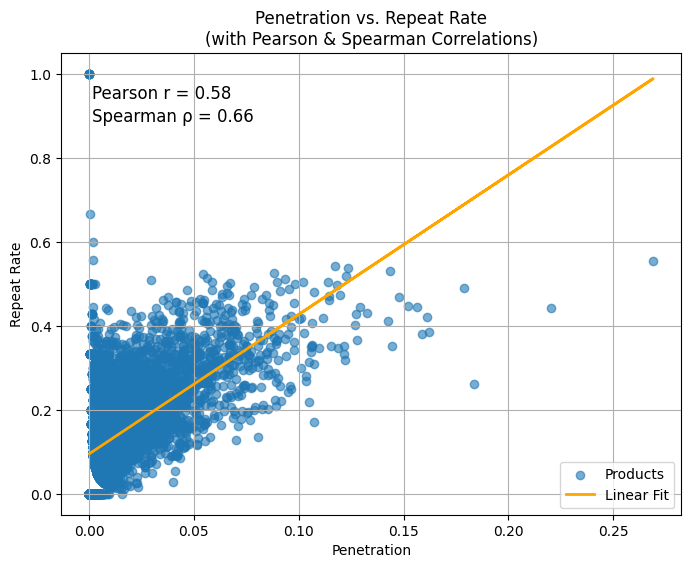

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

x = summary['Penetration']
y = summary['RepeatRate']

# Linear fit (for Pearson-based regression line)
m, b = np.polyfit(x, y, 1)

# Correlations
pearson_r = x.corr(y, method='pearson')
spearman_r, _ = spearmanr(x, y)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Products')
plt.plot(x, m*x + b, linewidth=2, color='orange', label='Linear Fit')

# Add correlation annotations
plt.text(0.05, 0.9, f'Pearson r = {pearson_r:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.85, f'Spearman ρ = {spearman_r:.2f}', transform=plt.gca().transAxes, fontsize=12)

plt.xlabel('Penetration')
plt.ylabel('Repeat Rate')
plt.title('Penetration vs. Repeat Rate\n(with Pearson & Spearman Correlations)')
plt.legend()
plt.grid(True)
plt.show()


The plot shows a **moderate positive correlation** between penetration and repeat rate (Pearson r = 0.58; Spearman ρ = 0.66), indicating that products with more buyers also tend to have higher loyalty. This supports the **Double Jeopardy law**, which states that smaller-share products suffer from both fewer buyers and lower repeat rates (Ehrenberg, Goodhardt, & Barwise, 1990; Sharp, 2010). However, some low-penetration products exhibit relatively high repeat rates, hinting at niche or B2B effects that occasionally break the pattern (Sharp & Sharp, 1997; Sharp & Romaniuk, 2015). Overall, the results align with the empirical laws detailed in *How Brands Grow* Volumes 1 and 2.




---

**References:**

- Ehrenberg, A. S. C., Goodhardt, G. J., & Barwise, T. P. (1990). Double jeopardy revisited. *Journal of Marketing, 54*(3), 82–91. https://doi.org/10.1177/002224299005400306  
- Sharp, B. (2010). *How brands grow: What marketers don't know*. Oxford University Press.  
- Sharp, B., & Romaniuk, J. (2015). *How brands grow: Part 2*. Oxford University Press.  
- Sharp, B., & Sharp, A. (1997). Loyalty programs and their impact on repeat-purchase loyalty patterns. *International Journal of Research in Marketing, 14*(5), 473–486. https://doi.org/10.1016/S0167-8116(97)00022-0


# **Regression analysis to check the strenght of the variables**

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 4199, number of used features: 2
[LightGBM] [Info] Start training from score 0.146032


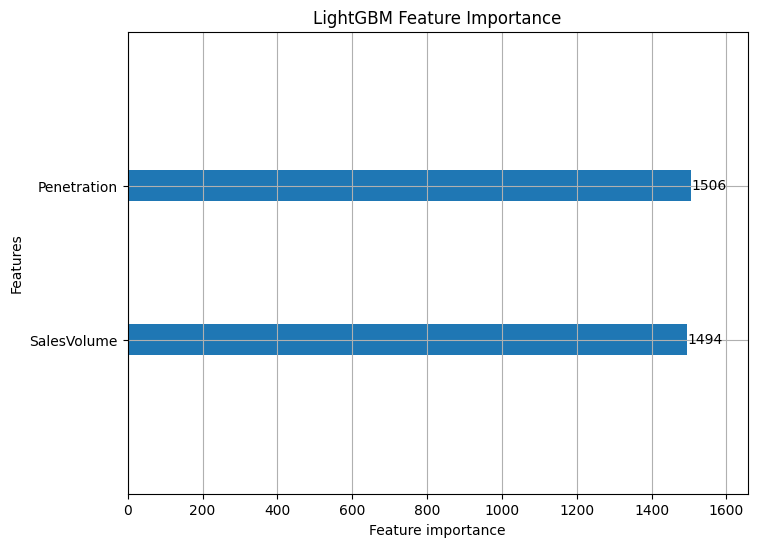

RMSE on test set: 0.0981


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 1. Prepare data
features = ['Penetration']
if 'SalesVolume' in summary.columns:
    features.append('SalesVolume')
X = summary[features]
y = summary['RepeatRate']

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train LightGBM regressor
model = lgb.LGBMRegressor(objective='regression', n_estimators=100)
model.fit(X_train, y_train)

# 4. Extract feature importances
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)


# 5. Plot feature importance
lgb.plot_importance(model, importance_type='split', figsize=(8, 6))
plt.title("LightGBM Feature Importance")
plt.show()

# 6. Evaluate model performance
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE on test set: {rmse:.4f}')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score

# 1. Normalize feature importances to percentages
importance_df['Percentage'] = (
    importance_df['Importance']
    / importance_df['Importance'].sum()
    * 100
)
print("Feature Importance with Percentages:\n")
print(importance_df)

# 2. Compute R^2 on the test set
r2 = r2_score(y_test, model.predict(X_test))
print(f"\nModel R^2: {r2:.3f}  (i.e. {r2*100:.1f}% of variance explained by both of the variables)")


Feature Importance with Percentages:

       Feature  Importance  Percentage
0  Penetration        1506        50.2
1  SalesVolume        1494        49.8

Model R^2: 0.399  (i.e. 39.9% of variance explained by both of the variables)


#**Correlation between Penetration and Sales volume**

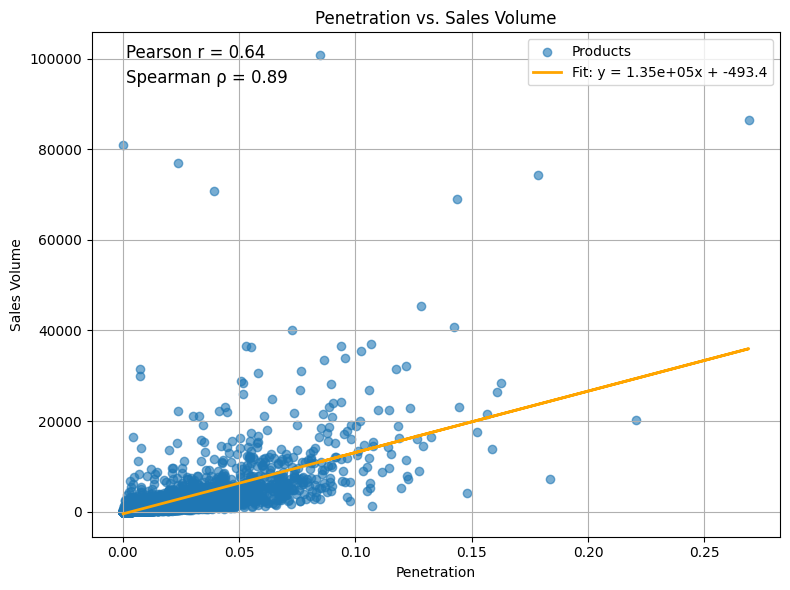

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Assume `summary` DataFrame has 'Penetration' and 'SalesVolume' columns

x = summary['Penetration']
y = summary['SalesVolume']

# Compute correlations
pearson_r, _ = pearsonr(x, y)
spearman_r, _ = spearmanr(x, y)

# Fit linear regression line
m, b = np.polyfit(x, y, 1)
y_line = m * x + b

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, label='Products')
plt.plot(x, y_line, color='orange', linewidth=2, label='Fit: y = {:.2e}x + {:.1f}'.format(m, b))
plt.xlabel('Penetration')
plt.ylabel('Sales Volume')
plt.title('Penetration vs. Sales Volume')
plt.text(0.05, 0.95, f'Pearson r = {pearson_r:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.90, f'Spearman ρ = {spearman_r:.2f}', transform=plt.gca().transAxes, fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The **Penetration vs. Sales Volume** plot reveals a **moderate Pearson correlation** (r = 0.64) alongside a **strong Spearman rank correlation** (ρ = 0.89). This means that, while a straight-line model explains much of the relationship between how many customers buy a product and how many units they purchase, the overall ordering of products by penetration and volume is even more consistent than the linear fit alone suggests.

Although related, **penetration** (the share of buyers) and **sales volume** (total units sold) capture different facets of “brand size.” In our LightGBM regression predicting **repeat rate**, each feature contributed roughly half of the explained variance (~40%), confirming that both the breadth of a product’s customer base and the depth of purchase quantities are key to understanding loyalty behavior.

# **Potential Limitations**

1. **Wholesaler Bias:**  
   Many customers in the dataset are wholesalers, which may inflate purchase frequencies and distort typical consumer behavior.

2. **Timeframe Constraints:**  
   The data covers transactions from December 2009 to December 2011; seasonal effects or shifts in consumer trends beyond this period are not captured.

3. **Returns Handling:**  
   We excluded transactions with negative quantities (returns), but this might omit valuable information about product satisfaction or churn.

4. **Country-Specific Focus:**  
   Filtering for the United Kingdom excludes international buyers, limiting the generalizability of the findings to other markets.

5. **Subset of Products:**  
   This analysis is based on a subset of all available products, which may not fully represent the retailer’s entire product range or category dynamics.
